# Linear Systems 🧭

## The start of it all
This toolbox was deveoped to synthesize trajectories satisfying a given task expressed as a [Signal Temporal Logic](stl.ipynb) formula using sampling-based methods. We will talk more about STL formulas later, but for it will be enought to have the intuition that STL formulas encode spatio-temporal behaviours that we would like our system to follow. We would like for example to find trajectories that revisit a certain region of interest (e.g. a charging station) every 10 minute. Otherwise, we might want to visit a certain location "eventually between 10 and 20 minutes" to deliver a package, for example. These, and many other tasks, can be encoded as formulas in a formal language that is, in this case, STL!


Before delving into more details with STL we can to recap a few details about the linear systems we consider. Namely, recall that  continuous-time linear systems are described as

$$
\dot{x} = Ax + Bu.
$$

with state $x \in \mathbb{R}^{n}$ and input $u \in \mathbb{R}^{m}$. We can easily create a continuous time dynamical system by the following piece of code.

In [7]:
import numpy as np
from stl_tool.stl  import ContinuousLinearSystem

A   = np.array([[1.,2.],
                [4.,5.]])
B   =  np.array([[1.,0.],
                 [0.,1.]])
dt  = 1.0 

system  = ContinuousLinearSystem(A, B, dt = dt)

Here `A` and `B` are the system matrices and `dt` is the sampling times that will be used to sample your system inside the RRT planner as we will see later. While the systems class can not do much for now, it ca tell you if the system is controllable by checking the rank condition of the controllability matrix 

$$
\mathcal{C} = \begin{bmatrix}
B & AB & A^2B & \cdots & A^{n-1}B
\end{bmatrix} \in \mathbb{R}^{n \times nm}.
$$

You can check controllability by calling the bolean methods `is_controllable` as



In [8]:
system.is_controllable() # -> True or False 

np.True_

The `ContinuousLinearSystem` system class is still under development, but we will soon add more functionalities. For the purposes of planning, tho know the dynamics and the controllability properties of the systems is enough.
We consider the state $x\in \mathbb{R}^{n} \subseteq \mathbb{X}$ and the control input $u \in \mathbb{R}^{m} \subseteq \mathbb{U}$ where the sets $\mathbb{X}$ and $\mathbb{U}$ are bounded convex polytopes of the form

$$
\begin{aligned}
    \mathbb{X} := \{ x\in \mathbb{R}^{n} \mid D_x x\leq \vec{c}_x \},\\
    \mathbb{U} := \{ u\in \mathbb{R}^{m} \mid D_u u\leq \vec{c}_u \},
\end{aligned}
$$

where $D_{x}\in \mathbb{R}^{p_x\times n}$, $D_{u}\in \mathbb{R}^{p_u\times m}$, $\vec{c}_u \in \mathbb{R}^{p_{u}}$ and $\vec{c}_{x} \in \mathbb{R}^{p_{x}}$, with $p_x\geq n$ and $p_u\geq m$. It is almost always the case that you state and inputs are indeed easily bounded by a set that can at least be approximated by a polytope. A very typical case is given by box constraints. Namely, the constraint 
$$
u_{min} \leq u \leq u_{max}
$$
for $u\in \mathbb{R}^2$ can be easily encoded as a polytope as
$$ 
\left[\begin{array}{cc}
1 & 0 \\
0 & 1 \\
-1 & 0 \\
0 & -1 \\
\end{array}\right] u \leq
\left[\begin{array}{c}
u_{max}  \\
u_{max} \\
-u_{min}\\
-u_{min} \\
\end{array}\right]
$$
of course it would be quite boring to have to do this all the times, so there is a simple calss that wraps this transformation for you. 

In [9]:
from stl_tool.polyhedron import Box2d
max_input     = 5.
input_bounds  = Box2d(x = 0.,y = 0.,size = max_input*2) 

What you did is to create a box bound for a two dimensional system, where the maximum and minimum values are given by `max_input`. We can print the polytope simply as

In [10]:
print(input_bounds)

Hyperplane representation of polytope
  [[ 1.00000   0.00000] |    [5.00000]
   [ 0.00000   1.00000] |    [5.00000]
   [-1.00000  -0.00000] |    [5.00000]
   [-0.00000  -1.00000] x <= [5.00000]



If you never heard about polyhedrons, you can recall that a polyhedron is a set of the general form $\{x \mid Ax \leq b\}$. A polytope is a just bounded polyhedron. We can work with polyehrons and polytopes using the class `Polyhedron` as explained in [on the Polyhedron page](polytope.ipynb). you can plot your polytope constraint very easily 


Text(0.5, 1.0, 'Input bounds')

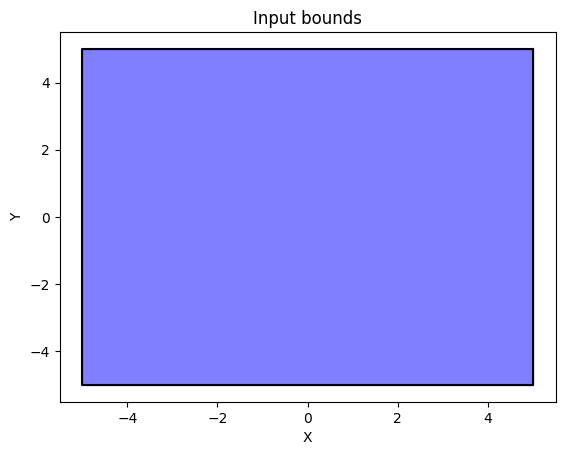

In [11]:
import matplotlib.pyplot as plt

input_bounds.plot(color="blue", alpha=0.5)
plt.title("Input bounds")

## Solutions 

We conclude this section recalling breifly that a solution to our linear dynamics is an absolutely continuous trajectory (a trajectory that is differentiable almost everywhere exept form some discrete points). Namely let $\zeta_{x}:[t_0,t_1] \rightarrow \mathbb{X}$ be a trajectory of the system and $\zeta_{u}:[t_0,t_1] \rightarrow \mathbb{U}$ a given control input respectong the bounds. Then $\zeta_{x}$ is a solution if


$$
\begin{aligned}
\zeta_x(t) &= \int_{t_0}^{t} f(\zeta_x(t), \zeta_u(t)) dt + x_0, \\
\dot{\zeta}_x(t) &= f(\zeta_x(t), \zeta_u(t)) \quad a.e. \;  t\in [t_0,t_1],
\end{aligned}
$$

Caratheorody solutions are considered when dealing with non-smooth analysis of systems for which Lipschitz continuous inputs are not sufficiently rich to analyze stability/invariance properties (e.g. hybrid systems). It is sufficient for you to remember that a solution is a trajectpry that respects the linear dynamics expect for some discerete set of points.

## Some References

[1] J. Cortes, "Discontinuous dynamical systems," in IEEE Control Systems Magazine, vol. 28, no. 3, pp. 36-73, June 2008, doi: 10.1109/MCS.2008.919306.
keywords: {Control systems;Robots;Switches;Temperature control;Adaptive control;Open loop systems;Optimal control;Cooling;Sliding mode control;State-space methods},

[2] Ziegler, Günter M. Lectures on polytopes. Vol. 152. Springer Science & Business Media, 2012.


 








